# SalishSeaCast Domain + Ariane CS plot
based on Ben's code from https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.io import loadmat
from cmocean import cm
import warnings
import cartopy
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, geo_tools

# import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')
from matplotlib.gridspec import GridSpec


# line p stuff
import re
import pandas as pd

In [2]:
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
ciopsbath = np.array([mesh.gdepw_1d[0,z] for z in mesh.mbathy[0,:]])

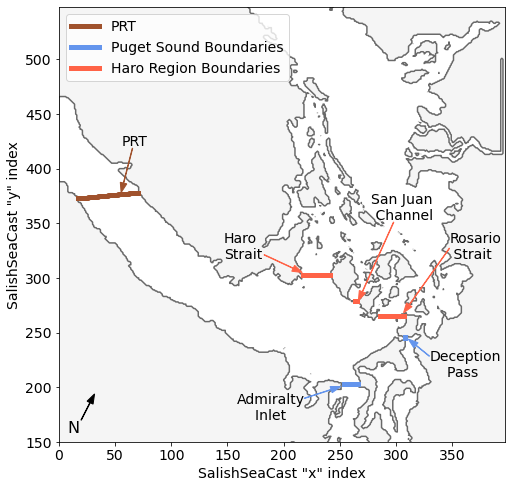

In [4]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
# grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylim([150,548])

# Add cross-sections
ax.plot([17,26,26,26,26,35,35,35,35,44,44,44,44,53,53,53,53,62,62,62,62,70],[373,373,373,374,374,374,374,375,375,375,375,376,376,376,376,377,377,377,377,378,378,378], lw=5, c='sienna', label = "PRT")
ax.plot([254,266],[203,203], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax.plot([308,308],[245,246], lw=5, c='cornflowerblue')
ax.plot([286,307],[265,265], lw=5, c='tomato', label = "Haro Region Boundaries")
ax.plot([263,265],[279,279], lw=5, c='tomato')
ax.plot([217,241],[303,303], lw=5, c ='tomato')
ax.legend(loc='upper left')
ax.set_ylabel('SalishSeaCast "y" index')
ax.set_xlabel('SalishSeaCast "x" index')

ax.text(0.37, 0.42, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.4, 0.05, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.875, 0.42, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.15, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.7, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.14,0.68,'PRT', transform=ax.transAxes)
ax.arrow(0.46, 0.43, 0.065, -0.031, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.505, -0.07, -0.16, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.875, 0.445, -0.09, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.83, 0.197, -0.03, 0.025, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.55, 0.1, 0.06, 0.02, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.165,0.675,-0.02,-0.08, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)

ax.arrow(0.05, 0.05, 0.02, 0.04, head_width=0.015, edgecolor='black', facecolor='black', transform=ax.transAxes, zorder=10)
ax.text(0.02, 0.02, 'N', transform=ax.transAxes, fontsize=16)


plt.savefig("./figures/SSCboundaries.pdf")

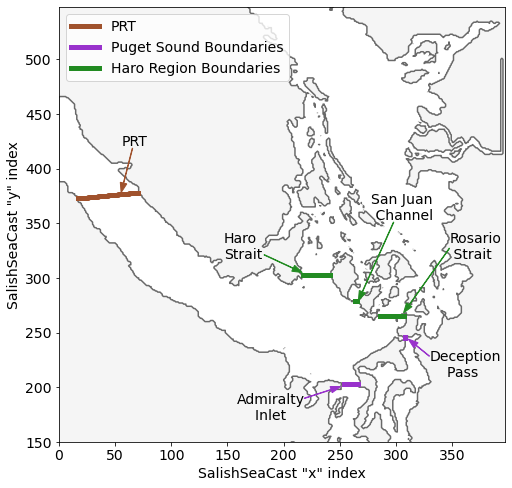

In [5]:
# same as above but colouring for defence

# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
# grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylim([150,548])

# Add cross-sections
ax.plot([17,26,26,26,26,35,35,35,35,44,44,44,44,53,53,53,53,62,62,62,62,70],[373,373,373,374,374,374,374,375,375,375,375,376,376,376,376,377,377,377,377,378,378,378], lw=5, c='sienna', label = "PRT")
ax.plot([254,266],[203,203], lw=5, c='darkorchid', label = "Puget Sound Boundaries")
ax.plot([308,308],[245,246], lw=5, c='darkorchid')
ax.plot([286,307],[265,265], lw=5, c='forestgreen', label = "Haro Region Boundaries")
ax.plot([263,265],[279,279], lw=5, c='forestgreen')
ax.plot([217,241],[303,303], lw=5, c ='forestgreen')
ax.legend(loc='upper left')
ax.set_ylabel('SalishSeaCast "y" index')
ax.set_xlabel('SalishSeaCast "x" index')

ax.text(0.37, 0.42, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.4, 0.05, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.875, 0.42, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.15, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.7, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.14,0.68,'PRT', transform=ax.transAxes)
ax.arrow(0.46, 0.43, 0.065, -0.031, head_width=0.015, edgecolor='forestgreen', facecolor='forestgreen', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.505, -0.07, -0.16, head_width=0.015, edgecolor='forestgreen', facecolor='forestgreen', transform=ax.transAxes, zorder=10)
ax.arrow(0.875, 0.445, -0.09, -0.13, head_width=0.015, edgecolor='forestgreen', facecolor='forestgreen', transform=ax.transAxes, zorder=10)
ax.arrow(0.83, 0.197, -0.03, 0.025, head_width=0.015, edgecolor='darkorchid', facecolor='darkorchid', transform=ax.transAxes, zorder=10)
ax.arrow(0.55, 0.1, 0.06, 0.02, head_width=0.015, edgecolor='darkorchid', facecolor='darkorchid', transform=ax.transAxes, zorder=10)
ax.arrow(0.165,0.675,-0.02,-0.08, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)

plt.savefig("./figures/SSCboundaries_defence.pdf")

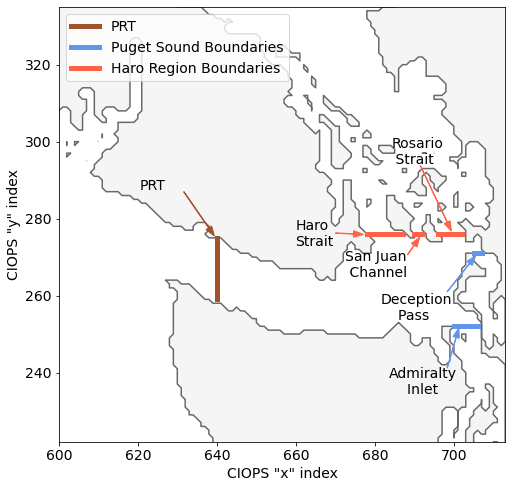

In [46]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([222,335])
ax.set_xlim([600,713])

# Add cross-sections
ax.plot([640,640],[259,275], lw=5, c='sienna', label = "PRT")
ax.plot([700,706],[252,252], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax.plot([705,707],[271,271], lw=5, c='cornflowerblue')
ax.plot([696,702],[276,276], lw=5, c='tomato', label = "Haro Region Boundaries")
ax.plot([690,692],[276,276], lw=5, c='tomato')
ax.plot([678,687],[276,276], lw=5, c ='tomato')
ax.legend(loc='upper left')
ax.set_ylabel('CIOPS "y" index')
ax.set_xlabel('CIOPS "x" index')

ax.text(0.53, 0.45, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.74, 0.11, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.745, 0.64, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.72, 0.28, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.64, 0.38, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.18,0.58,'PRT', transform=ax.transAxes)
ax.arrow(0.62, 0.48, 0.04, -0.002, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.81, 0.635, 0.06, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.781, 0.43, 0.015, 0.022, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.87, 0.345, 0.05, 0.065, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.87, 0.17, 0.02, 0.07, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.28,0.575,0.056,-0.083, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)


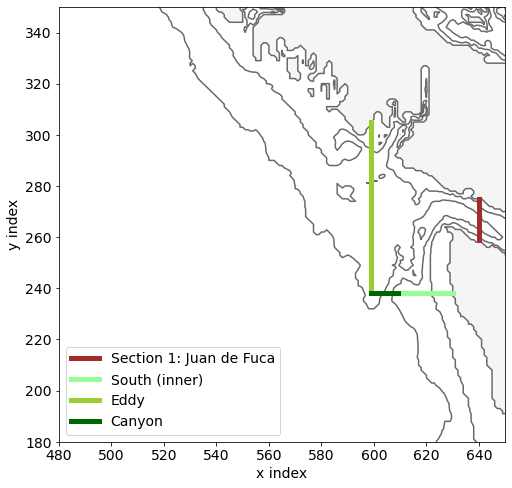

In [7]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,350])
ax.set_xlim([480,650])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[200,300],extend='max', colors='dimgrey')
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# inner (susan):
ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([609,630],[238,238], 'palegreen',linewidth=5, label='South (inner)')
ax.plot([599,599],[238,305], 'yellowgreen',linewidth=5, label='Eddy')
ax.plot([609,599],[238,238], 'darkgreen',linewidth=5, label='Canyon')
ax.legend(loc='lower left')

In [2]:
def ddm2dec(dms_str):
    """Return decimal representation of DDM (degree decimal minutes)
    
    >>> ddm2dec("45° 17,896' N")
    48.8866111111F
    """
    
    dms_str = re.sub(r'\s', '', dms_str)
    
    sign = -1 if re.search('[swSW]', dms_str) else 1
    
    numbers = [*filter(len, re.split('\D+', dms_str, maxsplit=4))]

    degree = numbers[0]
    minute_decimal = numbers[1] 
    decimal_val = numbers[2] if len(numbers) > 2 else '0' 
    minute_decimal += "." + decimal_val

    return sign * (int(degree) + float(minute_decimal) / 60)

In [3]:
P = pd.read_csv('lineP.txt', delim_whitespace=True)
P['lat_dec'] = np.array([ddm2dec(P.lat.astype(np.str)[i]) for i in range(len(P.lat))])
P['lon_dec'] = np.array([ddm2dec(P.lon.astype(np.str)[i])*-1 for i in range(len(P.lat))])

In [4]:
def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


def closest_point(lon,lat,model_lons,model_lats):
    tols={'tol_lon': 0.02, 'tol_lat': 0.01}
        # Search for a grid point with longitude and latitude within
        # tolerance of measured location
    j_list, i_list = np.where(
        np.logical_and(
            (np.logical_and(model_lons > lon - tols['tol_lon'],
                            model_lons < lon + tols['tol_lon'])),
            (np.logical_and(model_lats > lat - tols['tol_lat'],
                            model_lats < lat + tols['tol_lat']))
        )
    )

    if len(j_list) == 0:
        j,i = np.nan, np.nan
    elif len(j_list) == 1:
        j, i = j_list.item(0), i_list.item(0)
    else:
            # Several points within tolerance
            # Calculate distances for all and choose the closest

            # Avoiding array indexing because some functions
            # pass in model_lons and model_lats as netcdf4 objects
            # (which treat 'model_lons[j_list, i_list]' differently)
        lons = [model_lons[j_list[n], i_list[n]] for n in range(len(j_list))]
        lats = [model_lats[j_list[n], i_list[n]] for n in range(len(j_list))]
        dists = haversine(
            np.array([lon] * i_list.size), np.array([lat] * j_list.size),
            lons, lats)
        n = dists.argmin()
        j, i = j_list.item(n), i_list.item(n)
    
    return j,i

In [5]:
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
P['x'] = np.array([closest_point(P.lon_dec[i],P.lat_dec[i],mesh.nav_lon,mesh.nav_lat)[1] for i in range(len(P.lat))])
P['y'] = np.array([closest_point(P.lon_dec[i],P.lat_dec[i],mesh.nav_lon,mesh.nav_lat)[0] for i in range(len(P.lat))])

In [6]:
P.head()

,station,lat,lon,depth,instruments,lat_dec,lon_dec,x,y
0,P1,48°34.5,125°30.0,120,CTD,48.575000,-125.500000,597.0,275.0
1,P2,48°36.0,126°00.0,114,Rosette/Bongo,48.600000,-126.000000,579.0,275.0
2,P3,48°37.5,126°20.0,750,CTD,48.625000,-126.333333,566.0,275.0
3,P4,48°39.0,126°40.0,1300,Rosette/Bongo,48.650000,-126.666667,554.0,276.0
4,P5,48°41.5,127°10.0,2100,CTD,48.691667,-127.166667,535.0,277.0


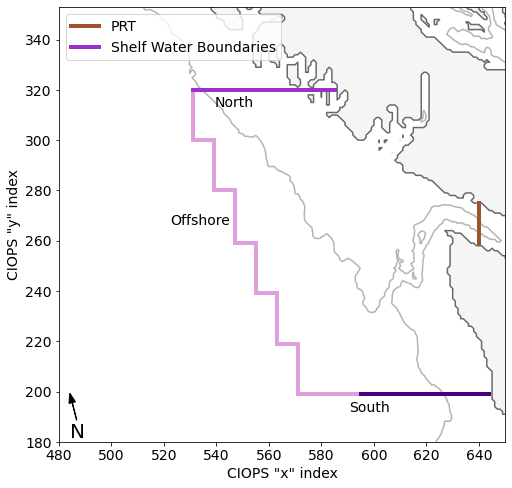

In [40]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,353])
ax.set_xlim([480,650])
ax.set_ylabel('CIOPS "y" index')
ax.set_xlabel('CIOPS "x" index')

c = ax.contour(ciopsbath, levels=[200],extend='max', colors='dimgrey', alpha=0.5)

ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='sienna', label = "PRT")
ax.plot([531,531],[319,300], 'plum',linewidth=4)#, label='Offshore')
ax.plot([531,539],[300,300], 'plum',linewidth=4)
ax.plot([539,539],[300,280], 'plum',linewidth=4)
ax.plot([539,547],[280,280], 'plum',linewidth=4)
ax.plot([547,547],[280,259], 'plum',linewidth=4)
ax.plot([547,555],[259,259], 'plum',linewidth=4)
ax.plot([555,555],[259,239], 'plum',linewidth=4)
ax.plot([563,555],[239,239], 'plum',linewidth=4)
ax.plot([563,563],[239,219], 'plum',linewidth=4)
ax.plot([563,571],[219,219], 'plum',linewidth=4)
ax.plot([571,571],[219,199], 'plum',linewidth=4)
ax.plot([571,594],[199,199], 'plum',linewidth=4)
ax.plot([531,585],[320,320], 'darkorchid',linewidth=4, label='Shelf Water Boundaries')
ax.plot([595,644],[199,199], 'indigo',linewidth=4)#, label='South (outer)')

# # ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
# ax.plot([609,630],[238,238], '#c2e699',linewidth=5)#, label='South (inner)')
# ax.plot([599,599],[238,305], '#74c476',linewidth=5, label='Eddy Influence Boundaries')
# ax.plot([609,599],[238,238], '#006837',linewidth=5)#, label='Canyon')

# add line P stations
# ax.scatter(P.x,P.y,color='k',label='Line P Stations 1-8')

ax.text(0.35, 0.77, 'North', transform=ax.transAxes)
ax.text(0.25, 0.5, 'Offshore', transform=ax.transAxes)
ax.text(0.65, 0.07, 'South', transform=ax.transAxes)
# ax.text(0.78, 0.345, 'South', transform=ax.transAxes)
# ax.text(0.65, 0.3, 'Canyon', transform=ax.transAxes)
# ax.text(0.61,0.5,'Eddy', transform=ax.transAxes)

ax.arrow(0.04, 0.05, -0.01, 0.04, head_width=0.015, edgecolor='black', facecolor='black', transform=ax.transAxes, zorder=10)
ax.text(0.025, 0.01, 'N', transform=ax.transAxes, fontsize=20)

ax.legend(loc='upper left')
plt.savefig("./figures/shelfBDYs.pdf")

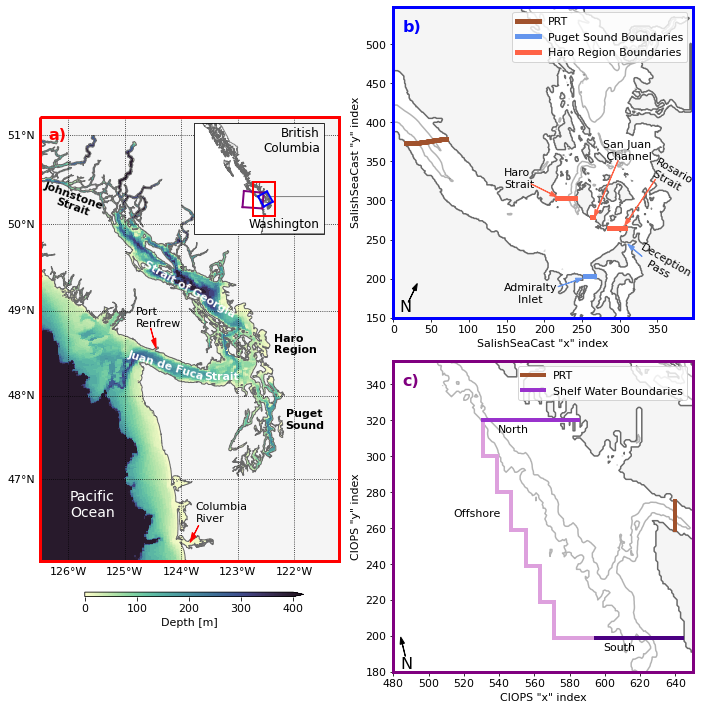

In [39]:
fig = plt.figure(constrained_layout=True, figsize=[10,10])
gs = GridSpec(2, 2, figure=fig)
xlim, ylim = [-126.5, -121.2], [46, 51.2]
proj= crs.Mercator(np.mean(xlim), *ylim)
ax0 = fig.add_subplot(gs[:, 0], projection=proj)
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

# first the overview map
# Load grid and mask files
grid = xr.open_dataset("/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc", mask_and_scale=False)

# Load grid and mask files of SalishSeaCast
grid2 = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)
coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
x, y = coords.nav_lon.values, coords.nav_lat.values

# Make plot area
ax0.set_extent(xlim + ylim)

# Depth SalishSeaCast
c = ax0.pcolormesh(
    grid2.nav_lon, grid2.nav_lat, grid2.Bathymetry, vmin = 0, vmax = 400,
    cmap=cm.deep, transform=crs.PlateCarree(), zorder=1,
)

#Depth CIOPS
c = ax0.pcolormesh(
    grid.nav_lon[:,:711], grid.nav_lat[:,:711], ciopsbath[:,:711], vmin = 0, vmax = 400,
    cmap=cm.deep, transform=crs.PlateCarree(),
)

# ax0.add_child_axes
cax = ax0.inset_axes([0.15, -0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, extend='max', orientation='horizontal', label='Depth [m]')

# Draw coastline
ax0.add_feature(feature.GSHHSFeature('full', edgecolor='dimgray', facecolor='whitesmoke'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax0.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
ax0.text(0.1, 0.1, 'Pacific\nOcean',c='w', transform=ax0.transAxes, fontsize=14)
ax0.text(0.82, 0.30, 'Puget\nSound', weight= "bold", transform=ax0.transAxes)
ax0.text(0.29, 0.41, 'Juan de Fuca', weight= "bold", c='w',transform=ax0.transAxes, rotation=-17,zorder = 11)
ax0.text(0.55, 0.41, 'Strait', weight= "bold", c='w',transform=ax0.transAxes,zorder = 11)
ax0.text(0.34, 0.55, 'Strait of Georgia', weight= "bold", c='w',transform=ax0.transAxes, rotation=-30)
ax0.text(0.01, 0.795, 'Johnstone', weight= "bold", transform=ax0.transAxes, rotation=-20)
ax0.text(0.05, 0.78, 'Strait', weight= "bold",transform=ax0.transAxes, rotation=-20)
ax0.text(0.78, 0.47, 'Haro\nRegion', weight= "bold", transform=ax0.transAxes)
ax0.text(0.32, 0.53, 'Port\nRenfrew', transform=ax0.transAxes)
ax0.text(0.52, 0.09, 'Columbia\nRiver', transform=ax0.transAxes)
ax0.arrow(0.53, 0.08, -0.015, -0.02, head_width=0.015, edgecolor='r', facecolor='r', transform=ax0.transAxes, zorder=10)
ax0.arrow(0.37, 0.525, 0.01, -0.025, head_width=0.015, edgecolor='r', facecolor='r', transform=ax0.transAxes, zorder=10)

# nice lil inset map
xlim_in, ylim_in = [-140, -110], [43, 59]
proj= crs.Mercator(np.mean(xlim_in), *ylim_in)
axins = inset_axes(ax0, width="50%", height="25%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=proj))

# Make plot area
axins.set_extent(xlim_in + ylim_in)

# Draw coastline
axins.add_feature(feature.GSHHSFeature('low', edgecolor='dimgray', facecolor='whitesmoke'), zorder=1)
axins.add_feature(feature.BORDERS, edgecolor='gray', zorder=1)

# make lil box in plot area to show region limits
axins.plot([xlim[0],xlim[1]],[ylim[0],ylim[0]],c='r',lw=2, zorder=7,transform=crs.PlateCarree())
axins.plot([xlim[0],xlim[1]],[ylim[1],ylim[1]],c='r',lw=2, zorder=7, transform=crs.PlateCarree())
axins.plot([xlim[0],xlim[0]],[ylim[0],ylim[1]],c='r',lw=2, zorder=7, transform=crs.PlateCarree())
axins.plot([xlim[1],xlim[1]],[ylim[0],ylim[1]],c='r',lw=2, zorder=7, transform=crs.PlateCarree())

# label washington and British Columbia
axins.text(0.97, .03, 'Washington', ha='right', va='bottom', transform=axins.transAxes, fontsize=12)
axins.text(0.97, .97, 'British\nColumbia', ha='right', va='top', transform=axins.transAxes, fontsize=12)

# Draw CIOPS box
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
axins.plot(mesh['nav_lon'][ 180:353,  480], mesh['nav_lat'][ 180:353,  480], color='purple', lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot(mesh['nav_lon'][ 180:353, 650], mesh['nav_lat'][ 180:353, 650], color='purple', lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot(mesh['nav_lon'][180,  480:650], mesh['nav_lat'][180,  480:650], color='purple', lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot(mesh['nav_lon'][353,  480:650], mesh['nav_lat'][353,  480:650], color='purple', lw=2, zorder=6, transform=crs.PlateCarree())

# Draw SalishSeaCast box
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
axins.plot(mesh['nav_lon'][150:548,0], mesh['nav_lat'][150:548,0], color='b', lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot(mesh['nav_lon'][150:548,-1], mesh['nav_lat'][150:548,-1], color='b', lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot(mesh['nav_lon'][150,:], mesh['nav_lat'][150,:], color='b', lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot(mesh['nav_lon'][548,:], mesh['nav_lat'][548,:], color='b', lw=2, zorder=6, transform=crs.PlateCarree())

#make border red to match inset
for spine in ax0.spines.values():
        spine.set_edgecolor('r')
        spine.set_linewidth(3)

# SalishSeaCast
# Load grid and mask files
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

# Overlay domain landmask and coastline
ax1.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax1.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax1.set_ylim([150,548])

c = ax1.contour(grid2.Bathymetry, levels=[200],extend='max', colors='dimgrey', alpha=0.5)

# Add cross-sections
ax1.plot([17,26,26,26,26,35,35,35,35,44,44,44,44,53,53,53,53,62,62,62,62,70],[373,373,373,374,374,374,374,375,375,375,375,376,376,376,376,377,377,377,377,378,378,378], lw=5, c='sienna', label = "PRT")
ax1.plot([254,266],[203,203], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax1.plot([308,308],[245,246], lw=5, c='cornflowerblue')
ax1.plot([286,307],[265,265], lw=5, c='tomato', label = "Haro Region Boundaries")
ax1.plot([263,265],[279,279], lw=5, c='tomato')
ax1.plot([217,241],[303,303], lw=5, c ='tomato')
ax1.legend(loc='upper right')
ax1.set_ylabel('SalishSeaCast "y" index')
ax1.set_xlabel('SalishSeaCast "x" index')

ax1.text(0.37, 0.42, 'Haro\nStrait', transform=ax1.transAxes)
ax1.text(0.37, 0.05, 'Admiralty\n    Inlet', transform=ax1.transAxes)
ax1.text(0.85, 0.4, 'Rosario\n Strait', transform=ax1.transAxes, rotation=-30)
ax1.text(0.8, 0.1, 'Deception\n    Pass', transform=ax1.transAxes, rotation=-30)
ax1.text(0.7, 0.51, 'San Juan\n Channel', transform=ax1.transAxes)
# ax1.text(0.14,0.68,'PRT', transform=ax1.transAxes)
ax1.arrow(0.46, 0.43, 0.065, -0.031, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax1.transAxes, zorder=10)
ax1.arrow(0.75, 0.505, -0.07, -0.16, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax1.transAxes, zorder=10)
ax1.arrow(0.875, 0.445, -0.09, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax1.transAxes, zorder=10)
ax1.arrow(0.83, 0.197, -0.03, 0.025, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax1.transAxes, zorder=10)
ax1.arrow(0.55, 0.1, 0.06, 0.02, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax1.transAxes, zorder=10)
# ax1.arrow(0.165,0.675,-0.02,-0.08, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax1.transAxes, zorder=10)

ax1.arrow(0.05, 0.05, 0.02, 0.04, head_width=0.015, edgecolor='black', facecolor='black', transform=ax1.transAxes, zorder=10)
ax1.text(0.02, 0.02, 'N', transform=ax1.transAxes, fontsize=16)

#make border match inset
for spine in ax1.spines.values():
        spine.set_edgecolor('b')
        spine.set_linewidth(3)

# CIOPS
# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Overlay domain landmask and coastline
ax2.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax2.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax2.set_ylim([180,353])
ax2.set_xlim([480,650])
ax2.set_ylabel('CIOPS "y" index')
ax2.set_xlabel('CIOPS "x" index')

c = ax2.contour(ciopsbath, levels=[200,1000],extend='max', colors='dimgrey', alpha=0.5)
ax2.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax2.plot([640,640],[259,275], lw=4, c='sienna', label = "PRT")
ax2.plot([531,531],[319,300], 'plum',linewidth=4)#, label='Offshore')
ax2.plot([531,539],[300,300], 'plum',linewidth=4)
ax2.plot([539,539],[300,280], 'plum',linewidth=4)
ax2.plot([539,547],[280,280], 'plum',linewidth=4)
ax2.plot([547,547],[280,259], 'plum',linewidth=4)
ax2.plot([547,555],[259,259], 'plum',linewidth=4)
ax2.plot([555,555],[259,239], 'plum',linewidth=4)
ax2.plot([563,555],[239,239], 'plum',linewidth=4)
ax2.plot([563,563],[239,219], 'plum',linewidth=4)
ax2.plot([563,571],[219,219], 'plum',linewidth=4)
ax2.plot([571,571],[219,199], 'plum',linewidth=4)
ax2.plot([571,594],[199,199], 'plum',linewidth=4)
ax2.plot([531,585],[320,320], 'darkorchid',linewidth=4, label='Shelf Water Boundaries')
ax2.plot([595,644],[199,199], 'indigo',linewidth=4)

ax2.text(0.35, 0.77, 'North', transform=ax2.transAxes)
ax2.text(0.2, 0.5, 'Offshore', transform=ax2.transAxes)
ax2.text(0.7, 0.07, 'South', transform=ax2.transAxes)

ax2.arrow(0.04, 0.05, -0.01, 0.04, head_width=0.015, edgecolor='black', facecolor='black', transform=ax2.transAxes, zorder=10)
ax2.text(0.025, 0.01, 'N', transform=ax2.transAxes, fontsize=16)

ax2.legend(loc='upper right')

# figure labels
ax0.text(0.03, 0.95, 'a)', color='r', weight= "bold",transform=ax0.transAxes, fontsize=16)
ax1.text(0.03, 0.92, 'b)', color='b', weight= "bold",transform=ax1.transAxes, fontsize=16)
ax2.text(0.03, 0.92, 'c)', color='purple', weight= "bold",transform=ax2.transAxes, fontsize=16)

#make border match inset
for spine in ax2.spines.values():
        spine.set_edgecolor('purple')
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig("./figures/studyregion.pdf")


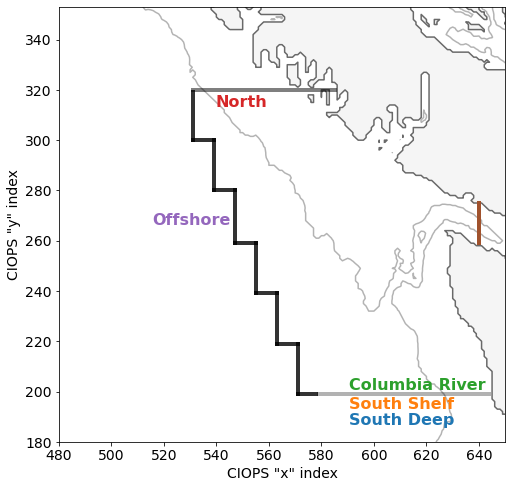

In [18]:
# Above but only outer and colouring for defence

# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,353])
ax.set_xlim([480,650])
ax.set_ylabel('CIOPS "y" index')
ax.set_xlabel('CIOPS "x" index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[300],extend='max', colors='dimgrey', alpha=0.5)
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='sienna', label = "PRT")
ax.plot([531,531],[319,300], 'black',alpha=0.8,linewidth=4)#, label='Offshore')
ax.plot([531,539],[300,300], 'black',alpha=0.8,linewidth=4)
ax.plot([539,539],[300,280], 'black',alpha=0.8,linewidth=4)
ax.plot([539,547],[280,280], 'black',alpha=0.8,linewidth=4)
ax.plot([547,547],[280,259], 'black',alpha=0.8,linewidth=4)
ax.plot([547,555],[259,259], 'black',alpha=0.8,linewidth=4)
ax.plot([555,555],[259,239], 'black',alpha=0.8,linewidth=4)
ax.plot([563,555],[239,239], 'black',alpha=0.8,linewidth=4)
ax.plot([563,563],[239,219], 'black',alpha=0.8,linewidth=4)
ax.plot([563,571],[219,219], 'black',alpha=0.8,linewidth=4)
ax.plot([571,571],[219,199], 'black',alpha=0.8,linewidth=4)
ax.plot([571,578],[199,199], 'black',alpha=0.8,linewidth=4)
ax.plot([531,585],[320,320], 'black',alpha=0.5,linewidth=4, label='Shelf Water Boundaries')
ax.plot([579,644],[199,199], 'black',alpha=0.3,linewidth=4)#, label='South (outer)')

ax.text(0.35, 0.77, 'North', c='tab:red', fontsize=16,weight='bold',  transform=ax.transAxes)
ax.text(0.21, 0.5, 'Offshore', c='tab:purple', fontsize=16, weight='bold', transform=ax.transAxes)
ax.text(0.65, 0.075, 'South Shelf', c='tab:orange', fontsize=16, weight='bold', transform=ax.transAxes)
ax.text(0.65, 0.04, 'South Deep', c='tab:blue', fontsize=16, weight='bold', transform=ax.transAxes)
ax.text(0.65, 0.12, 'Columbia River', c='tab:green', fontsize=16, weight='bold', transform=ax.transAxes)

# ax.legend(loc='upper left')
plt.savefig("./figures/shelfBDYs_defence.png")

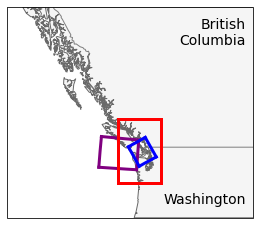

In [17]:
xlim, ylim = [-126.5, -121.2], [46, 51.2]
xlim_in, ylim_in = [-140, -110], [43, 59]

proj= crs.Mercator(np.mean(xlim_in), *ylim_in)

fig = plt.figure(constrained_layout=True, figsize=[3.5,3.5])
ax = fig.add_subplot(111,projection=proj)

# Make plot area
ax.set_extent(xlim_in + ylim_in)


# Draw coastline
ax.add_feature(feature.GSHHSFeature('low', edgecolor='dimgray', facecolor='whitesmoke'), zorder=1)
ax.add_feature(feature.BORDERS, edgecolor='gray', zorder=1)

# make lil box in plot area to show region limits
ax.plot([xlim[0],xlim[1]],[ylim[0],ylim[0]],c='r',lw=3, zorder=7,transform=crs.PlateCarree(), label='Plot Area')
ax.plot([xlim[0],xlim[1]],[ylim[1],ylim[1]],c='r',lw=3, zorder=7, transform=crs.PlateCarree())
ax.plot([xlim[0],xlim[0]],[ylim[0],ylim[1]],c='r',lw=3, zorder=7, transform=crs.PlateCarree())
ax.plot([xlim[1],xlim[1]],[ylim[0],ylim[1]],c='r',lw=3, zorder=7, transform=crs.PlateCarree())

# label washington and British Columbia
ax.text(0.97, .05, 'Washington', ha='right', va='bottom', transform=ax.transAxes, fontsize=14)
ax.text(0.97, .95, 'British\nColumbia', ha='right', va='top', transform=ax.transAxes, fontsize=14)

# Draw CIOPS box
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
ax.plot(mesh['nav_lon'][ 180:353,  480], mesh['nav_lat'][ 180:353,  480], color='purple', lw=3, zorder=6, transform=crs.PlateCarree())
ax.plot(mesh['nav_lon'][ 180:353, 650], mesh['nav_lat'][ 180:353, 650], color='purple', lw=3, zorder=6, transform=crs.PlateCarree())
ax.plot(mesh['nav_lon'][180,  480:650], mesh['nav_lat'][180,  480:650], color='purple', lw=3, zorder=6, transform=crs.PlateCarree())
ax.plot(mesh['nav_lon'][353,  480:650], mesh['nav_lat'][353,  480:650], color='purple', lw=3, zorder=6, transform=crs.PlateCarree())

# Draw SalishSeaCast box
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
ax.plot(mesh['nav_lon'][150:548,0], mesh['nav_lat'][150:548,0], color='b', lw=3, zorder=6, transform=crs.PlateCarree())
ax.plot(mesh['nav_lon'][150:548,-1], mesh['nav_lat'][150:548,-1], color='b', lw=3, zorder=6, transform=crs.PlateCarree())
ax.plot(mesh['nav_lon'][150,:], mesh['nav_lat'][150,:], color='b', lw=3, zorder=6, transform=crs.PlateCarree())
ax.plot(mesh['nav_lon'][548,:], mesh['nav_lat'][548,:], color='b', lw=3, zorder=6, transform=crs.PlateCarree())



In [4]:
mesh['nav_lon']

<xarray.DataArray 'nav_lon' (y: 1020, x: 714)>
[728280 values with dtype=float32]
Dimensions without coordinates: y, x